<a href="https://colab.research.google.com/github/Hamza-t/Language-Identification/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello!
In this notebook, we will visualise our data distribution.


In [ ]:
#Import data file 
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/NLP-Project-INSAT"
!ls "/content/drive/MyDrive/My_work/NLP-Project-INSAT"

 cleaned_data.csv	   Data_cleaning.ipynb	    Data_visualization.ipynb
'Data augmentation'	  'data collection '	   'General Data'
 Data_Augmentation.ipynb   Data_Preparation.ipynb   prepared_data.csv


In [ ]:
##assign data path 
data_path = folder_path + "/" + "cleaned_data.csv"

In [ ]:
#read data
import pandas as pd
data = pd.read_csv(data_path)
data = data[["text","label"]]

In [ ]:
data.head()

,text,label
0,ana fil ghorba w sout el athan ahla haja 3ijbi...,3
1,man eheb rasoule mohamed,3
2,rabi yerhmou sofiane cha3ri,3
3,rabi yarahmak ya sbou3i wou yarham kol om mita,3
4,merci beaucoup salime,1


##let's create beautiful graphs
- The total number of comments.
- Plot the distribution of each class. Balanced data?
- The unique word count in each class.
- The max and mean sentence length in each class.
- Word frequency analysis

In [ ]:
#Import library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

####The total number of comments && the distribution of each class.

In [ ]:
#total number
print(f"the total number of comments is {len(data['text'])}")

the total number of comments is 8336


In [ ]:
#number of each class
langage = {0:'Arabic', 1:'French', 2:'English', 3:'Tunizi', 4:'Code-switching'}
length = []
for i in langage.keys():
  print(f"the total number of {langage[i]} is {len(data[data['label']==i])}")
  length.append(len(data[data['label']==i]))

the total number of Arabic is 2225
the total number of French is 373
the total number of English is 86
the total number of Tunizi is 4398
the total number of Code-switching is 1254


[Text(0.5, 1.0, 'Number of comment in each class')]

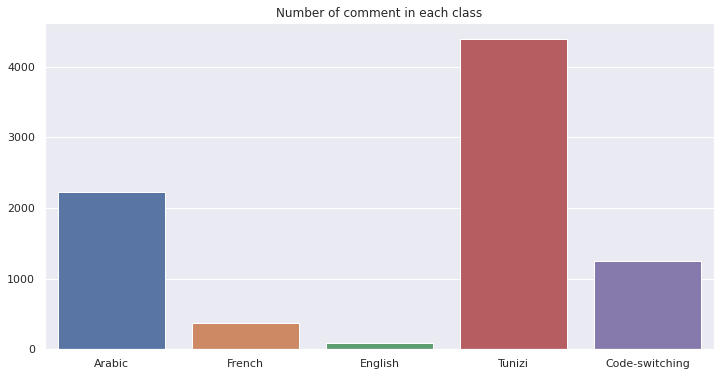

In [ ]:
#distribution
sns.set(rc={'figure.figsize':(12,6)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=list(langage.values()), y=length).set(title='Number of comment in each class')

####The unique word count in each class.

In [ ]:
#count the number of unique word in each class and visualise it!

#count the number of unique word function
def unique_word(lang):
  df = data[data['label']==[k for k, v in langage.items() if v == lang][0]]
  #print(len(df))
  texts = ""
  for text in list(df['text']):
    texts += str(text)
  return len(set(texts.split(' ')))

In [ ]:
#count the number of unique word in each class
number_unique_word = []
for lang in list(langage.values()):
  number_unique_word.append(unique_word(lang))

[Text(0.5, 1.0, 'Number of unique word in each class')]

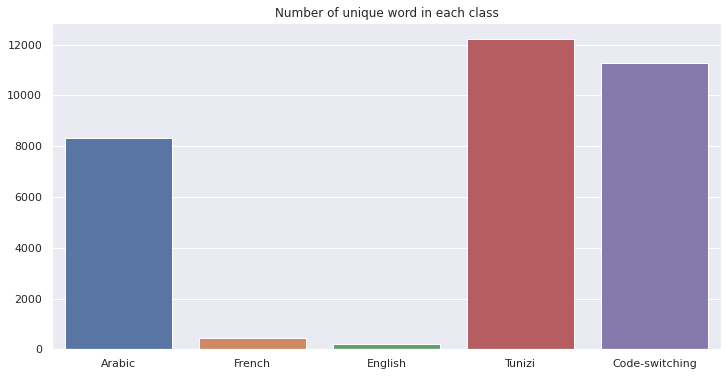

In [ ]:
#visualise! 
sns.set(rc={'figure.figsize':(12,6)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=list(langage.values()), y=number_unique_word).set(title='Number of unique word in each class')

####The max and mean sentence length in each class.

In [ ]:
#return the max and the mean sentence lenght function

def max_mean(lang):
  df = data[data['label']==[k for k, v in langage.items() if v == lang][0]]
  lens = [] #all comments lengths 
  for text in list(df['text']):
    lens.append(len(str(text)))
  return max(lens), sum(lens)/len(lens)

In [ ]:
#return the max and the mean sentence lenght in each class
max_class = []
mean_class = []
for lang in list(langage.values()):
  max_class.append(max_mean(lang)[0])
  mean_class.append(max_mean(lang)[1])

[Text(0.5, 1.0, 'the max sentence lenght in each langage')]

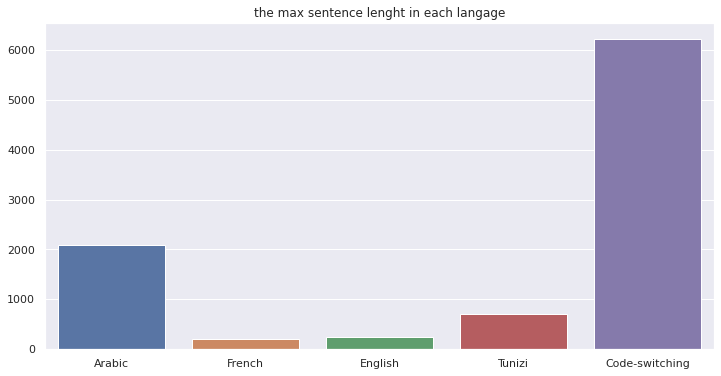

In [ ]:
#visualise! 
sns.set(rc={'figure.figsize':(12,6)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=list(langage.values()), y=max_class).set(title='the max sentence lenght in each langage')

[Text(0.5, 1.0, 'the mean sentence lenght in each class')]

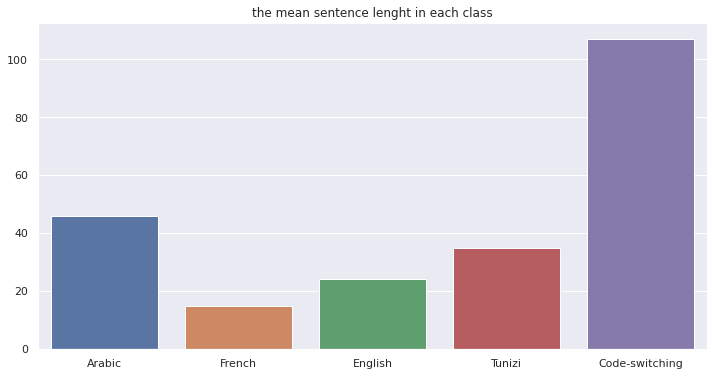

In [ ]:
#visualise! 
sns.set(rc={'figure.figsize':(12,6)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=list(langage.values()), y=mean_class).set(title='the mean sentence lenght in each class')

####Word frequency analysis
1.   Remove stop words from the text
2.   Get a list of all words after removing stop words in each langage
3.   Analysing word frequency and plot the graph in each langage

In [ ]:
df = data.copy()

#####Remove stop words from the text 

In [ ]:
import re
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
#create a list of stop words 
stop_words = stopwords.words('french')+stopwords.words('arabic')+stopwords.words('english')

#####Get a list of all words after removing stop words in each langage

In [ ]:
def word_list(lang):
  df = data[data['label']==[k for k, v in langage.items() if v == lang][0]]
  words = []
  for text in list(df['text']):
    for word in str(text).split(" "):
      if word not in stop_words:
        words.append(word)
  return words

#####Analysing word frequency and plot the graph in each langage

In [ ]:
word_list("Arabic")[:4]

['أحترماتي', 'أحمق', 'أسفي', 'بلديهل']

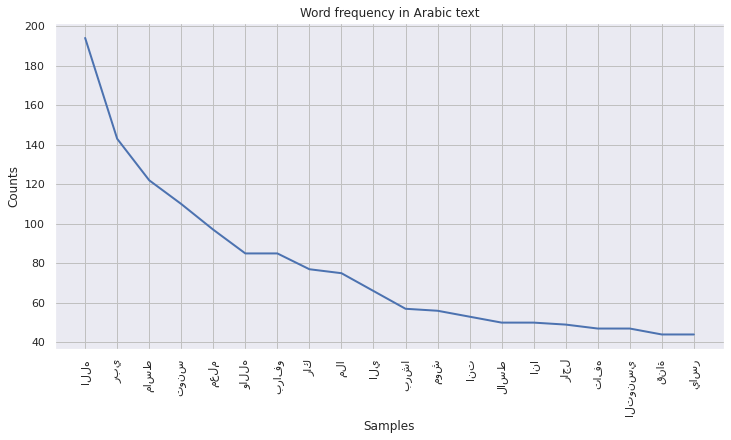

In [ ]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(word_list("Arabic"))
nlp_words.plot(20,title='Word frequency in Arabic text');

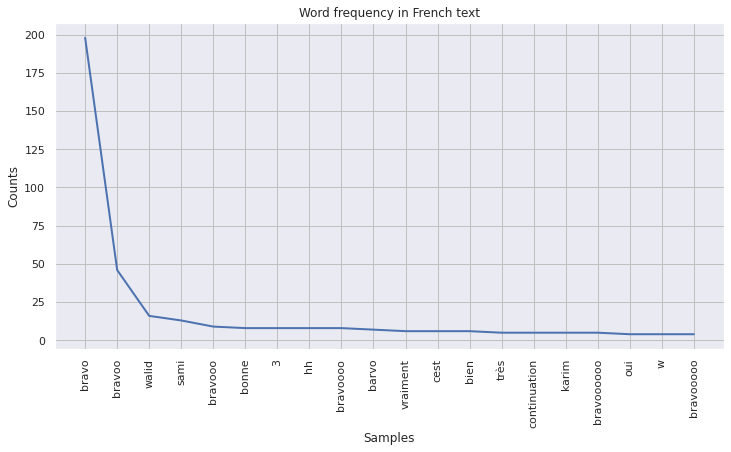

In [ ]:
nlp_words=nltk.FreqDist(word_list("French"))
nlp_words.plot(20,title='Word frequency in French text');

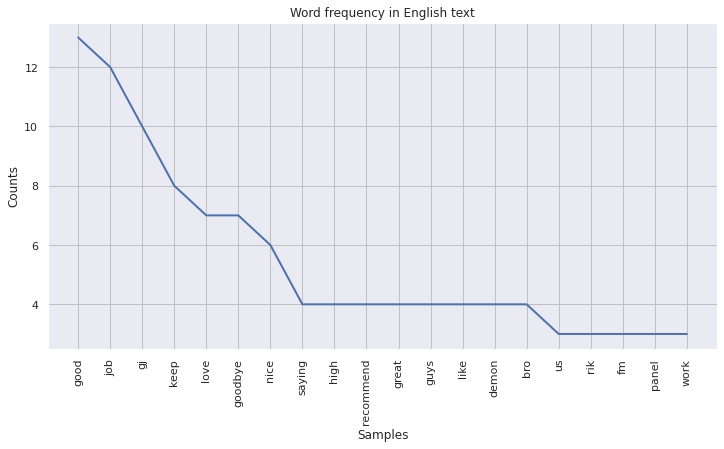

In [ ]:
nlp_words=nltk.FreqDist(word_list("English"))
nlp_words.plot(20,title='Word frequency in English text');

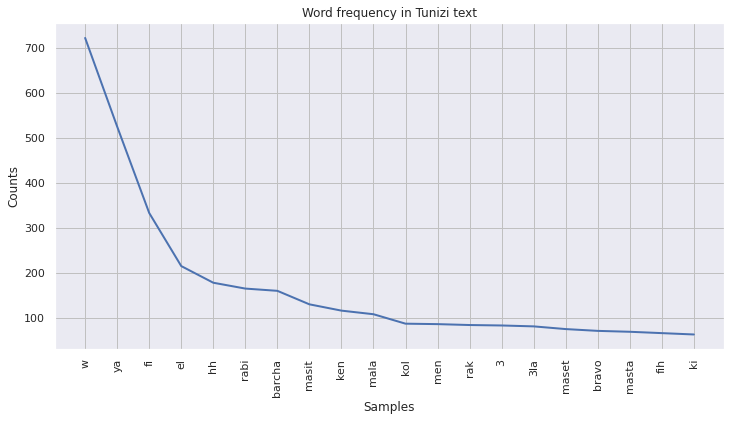

In [ ]:
nlp_words=nltk.FreqDist(word_list("Tunizi"))
nlp_words.plot(20,title='Word frequency in Tunizi text');

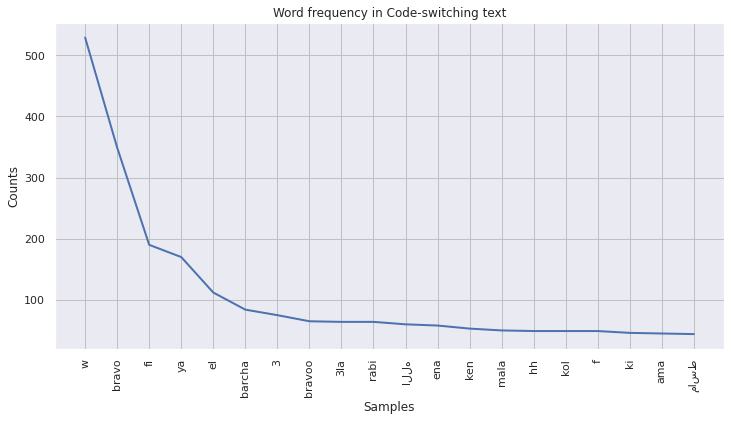

In [ ]:
nlp_words=nltk.FreqDist(word_list("Code-switching"))
nlp_words.plot(20,title='Word frequency in Code-switching text');

###Remark

*   The data is not balanced: a major difference between the English/French languages and tunizi in terms of the number of comments and the number of unique words.
*   There is a difference between code-switching/tunizi and other classes: the largest number of unique words and max/mean sentence is important.
*   The data must be balanced in terms of number of word and unique word (vocab) in all the text
*   To get closed to the number of comments that we shoold add to our data in each class, we will use a new feature alpha of each class
*   alpha = (Num of unique words / mean_all_comments)
*   Num of words : number of unique words in each class
*   mean_all_comments : the mean length of all comments 

In [ ]:
import numpy as np

In [ ]:
alpha = np.array(number_unique_word)/(sum(mean_class)/len(mean_class))

In [ ]:
alpha

array([182.92139804,   9.69338339,   5.01154515, 268.93094269,
       248.20336779])

[Text(0.5, 1.0, '*')]

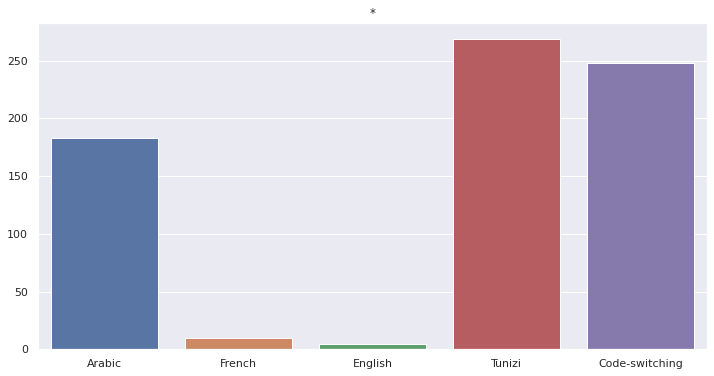

In [ ]:
#visualise! 
sns.set(rc={'figure.figsize':(12,6)})
#per_lang = final_scraped_data['labels'].value_counts()
sns.barplot(x=list(langage.values()), y=alpha).set(title='*')

**We need a data augmentation action in English/French/Arabic language (+ ~2000 comments for the arabic/ ~3500 comments for english and frensh),  and Code-switching class (+ ~2000 comments)**